# Average speed between to bus stops

import pickle library

In [1]:
import pickle

load pickled file

In [2]:
with open("mean_speed.pkl", "r") as f:
    mean_speed = pickle.load(f)

- The mean_speed variable is a python dictionary variable with 2 key levels. 

- First being the stop code of the original stop, second being the destination stop. 

- There has to be real connection between these two, otherwise key error will occur.

An example of accessing the value is given below

In [3]:
# average speed between stop code 52079 and 51099
Origin = "52079"
Destination = "51099"
print "Average speed between stop {} and {}:".format(Origin, Destination)
print "{} km/h".format(mean_speed[Origin][Destination])

Average speed between stop 52079 and 51099:
28.2192692829 km/h


Method to enumerate all speed values:

In [4]:
headers = ["Origin", "Destination", "Mean speed"]
values = []
for O in mean_speed:
    for D in mean_speed[O]:
        values.append([O , D, mean_speed[O][D]])

import pandas as pd
df = pd.DataFrame(values, columns=headers)
print df.head()

  Origin Destination  Mean speed
0  16079       16069   18.261842
1  14191       14201   22.406171
2  55349       55339   22.830780
3  22469       22189   11.139488
4  22469        3223   34.699908


Basic statistics

In [17]:
df["Mean speed"].describe()
df = df.dropna()
print df["Mean speed"].idxmax()
df = df.drop(df.index[5696])
print df.describe()

5696
         Mean speed
count   6504.000000
mean      23.238985
std      268.176990
min        0.061738
25%       14.039276
50%       17.764781
75%       22.434475
max    21524.400000


In [23]:
filtered = df[df["Mean speed"]<80.]
filtered.describe()

,Mean speed
count,6487.000000
mean,18.975199
std,7.381501
min,0.061738
25%,14.029966
50%,17.745610
75%,22.398241
max,79.847270


In [24]:
filtered["Mean speed"].idxmin()

3629

In [26]:
filtered.loc[3629]

Origin             47599
Destination        47591
Mean speed     0.0617377
Name: 3629, dtype: object

In [27]:
print filtered.count()
filtered = filtered[filtered["Mean speed"]> 1.]
print filtered.count()

Origin         6487
Destination    6487
Mean speed     6487
dtype: int64
Origin         6484
Destination    6484
Mean speed     6484
dtype: int64


In [28]:
filtered.describe()

,Mean speed
count,6484.000000
mean,18.983705
std,7.372600
min,1.587543
25%,14.033322
50%,17.748489
75%,22.399565
max,79.847270


(array([  2.34000000e+02,   2.80200000e+03,   2.42100000e+03,
          7.21000000e+02,   1.87000000e+02,   8.80000000e+01,
          1.90000000e+01,   7.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([  1.5875431 ,   9.41351582,  17.23948855,  25.06546127,
         32.891434  ,  40.71740672,  48.54337945,  56.36935217,
         64.1953249 ,  72.02129762,  79.84727035]),
 <a list of 10 Patch objects>)

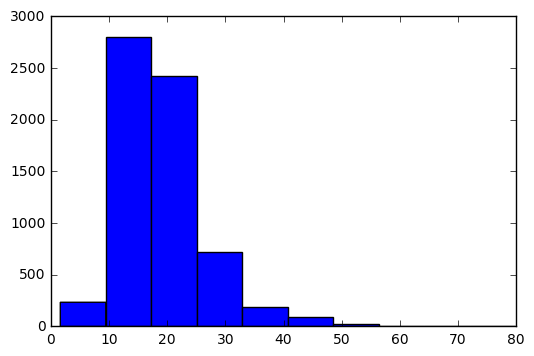

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(filtered["Mean speed"])